<br><p style="margin-left: 25%; font-size:20px;">Machine Learning Camp: HomeWork 7 Section 1</p><br>

## 1. **Extracting twitter data:** In this problem we would like to extract data from twitter.

a. **Twitter API:** Set up twitter API using any of the methods as mentioned in the class.

In [1]:
# TODO

b. Now search twitter messages for "data science job". Display few job informations.

In [2]:
# TODO

c. Search 300 tweets using the hash tag `#chess` and save them in an object called `rTweets`. Show the top 7 sources of tweets (such as android or iphone) in a ordered bar plot.

In [3]:
# TODO

d. Convert rTweets into a data frame and store it in an object called dTweets. Display some data from dTweets.

In [4]:
# TODO 

e. dTweets has a column showing the time the tweet was created. Generate a plot showing number of tweets on each of the hours.

In [5]:
# TODO

f. Arrange the dataframe dTweets based on the retweetCount. While doing this select only columns text, screenName, retweetCount. Store the data in a object called mostTweets. Display five texts that are most retweeted.

In [6]:
# TODO

g. Generate a bar chart showing top 15 screen names and count of retweets from mostTweets. Order the bars based on the retweet counts.

In [7]:
# TODO

## 2. **Working with databases:** Please follow the instruction below before answering the questions:
* Import the sqlite3
* Connect to titanic.db

In [8]:
import sqlite3
import pandas as pd
import seaborn as sns
conn=sqlite3.connect('titanic.db')
curs=conn.cursor()


a. What is the average age of passengers who survived? Group the data by Sex. Display only the column `Sex`, `AverageAge`

In [9]:
curs.execute('SELECT sex, AVG(age) FROM titanic WHERE Survived=1 group by sex;')
list(curs.fetchall())

[('female', 28.630769230769232), ('male', 27.276021505376345)]

b. What is the percentage of passengers who survived in each Passenger Class or `Pclass`? Group the data by `Sex`. Display Pclass, Sex, percentage value. 

In [10]:
curs.execute('SELECT sex,Pclass, count(Survived)*100/sum(count(*)) over() FROM titanic WHERE Survived=1 group by Pclass,sex')
curs.fetchall()

[('female', '1', 26),
 ('male', '1', 13),
 ('female', '2', 20),
 ('male', '2', 5),
 ('female', '3', 21),
 ('male', '3', 13)]

c. What is the average age of all the passenger (survived and not survived)? Group the data by `Pclass`, `Sex`, `Survived`. After that use `seaborn` to generate a line plot to show average age vs pclass, facet by sex and color it by survived.

In [11]:
curs.execute('SELECT sex,Pclass,Survived,AVG(Age) FROM titanic  group by Pclass,sex,Survived')
curs.fetchall()


[('female', '1', '0', 25.666666666666668),
 ('female', '1', '1', 34.5625),
 ('male', '1', '0', 44.58196721311475),
 ('male', '1', '1', 36.248000000000005),
 ('female', '2', '0', 36.0),
 ('female', '2', '1', 28.080882352941178),
 ('male', '2', '0', 33.36904761904762),
 ('male', '2', '1', 16.022),
 ('female', '3', '0', 23.818181818181817),
 ('female', '3', '1', 19.329787234042552),
 ('male', '3', '0', 27.25581395348837),
 ('male', '3', '1', 22.274210526315787)]

In [19]:
data=pd.read_sql('SELECT sex,Pclass,Survived,AVG(Age) FROM titanic  group by Pclass,sex,Survived',conn)
data

,Sex,Pclass,Survived,AVG(Age)
0,female,1,0,25.666667
1,female,1,1,34.562500
2,male,1,0,44.581967
3,male,1,1,36.248000
4,female,2,0,36.000000
5,female,2,1,28.080882
6,male,2,0,33.369048
7,male,2,1,16.022000
8,female,3,0,23.818182
9,female,3,1,19.329787


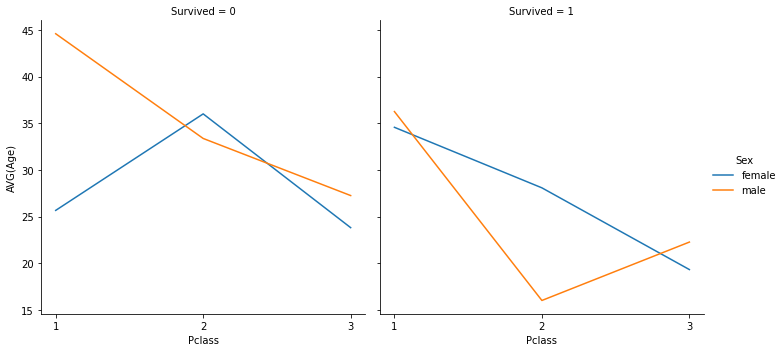

In [21]:
sns.relplot(data=data,x='Pclass',y='AVG(Age)',kind='line',hue='Sex',col='Survived')

d. What is the name, age, sex and pclass of the 5 oldest and 5 youngest persons who died?

In [33]:
curs.execute('SELECT Name,Age,sex,Pclass FROM titanic  WHERE Survived=0 AND Age IS NOT NULL  ORDER BY cast(Age as FLOAT) DESC')
curs.fetchmany(5)

[('Svensson, Mr. Johan', '74', 'male', '3'),
 ('Goldschmidt, Mr. George B', '71', 'male', '1'),
 ('Artagaveytia, Mr. Ramon', '71', 'male', '1'),
 ('Connors, Mr. Patrick', '70.5', 'male', '3'),
 ('Mitchell, Mr. Henry Michael', '70', 'male', '2')]

In [32]:
curs.execute('SELECT Name,Age,sex,Pclass FROM titanic  WHERE Survived=0 AND Age IS NOT NULL ORDER BY cast(Age as FLOAT) ASC')
curs.fetchmany(5)

[('Panula, Master. Eino Viljami', '1', 'male', '3'),
 ('Goodwin, Master. Sidney Leonard', '1', 'male', '3'),
 ('Palsson, Master. Gosta Leonard', '2', 'male', '3'),
 ('Rice, Master. Eugene', '2', 'male', '3'),
 ('Andersson, Miss. Ellis Anna Maria', '2', 'female', '3')]

e. On average which Passenger Class is more expensive?

In [34]:
curs.execute('SELECT AVG(Fare),Pclass FROM titanic group by Pclass ORDER BY  CAST(AVG(Fare) as FLOAT) DESC')
curs.fetchone()

(84.19351635514012, '1')